## 感知机简介

感知机 (perceptron) 是二类分类的线性分类模型，其输入为实例的特征向量，输 出为实例的类别，取 +1 和一1 二值。

感知机对应于输入空间(特征空间)中将实例划 分为正负两类的分离超平面，属于判别模型。

感知机学习旨在求出将训练数据进行线 性划分的分离超平面，为此，导入基于误分类的损失函数，利用梯度下降法对损失函 数进行极小化，求得感知机模型。 

感知机学习算法具有简单而易于实现的优点，分为 原始形式和对偶形式 。 感知机预测是用学习得到的感知机模型对新的输入实例进行分 类。

空间中任意一点$x_0$到超平面的距离：
$$\frac{|w*x_0+b|}{||w||}$$


分类策略：
$$\begin{cases} 
w*x_i+b>0 & y_i=+1\\
w*x_i+b<0 & y_i=-1
\end{cases}$$
\
$$\begin{cases} 
\frac{y_i(w*x_0+b)}{||w||}>0 & 分类正确\\
\frac{y_i(w*x_0+b)}{||w||}<0 & 分类错误
\end{cases}$$

损失函数（所有误分类点到超平面的距离）：
$$-\frac{\sum_{x_i\in M}y_i(w*x_i+b)}{||w||}$$
M为所有误分类点的集合

去掉$||w||$:
$$\min L(w,b)=-\sum_{x_i\in M}y_i(w*x_i+b)$$

梯度下降:
$$\begin{cases} 
\frac{dL}{dw}=-\sum_{x_i\in M}y_ix_i\\
\frac{dL}{db}=-\sum_{x_i\in M}y_i
\end{cases}$$



## 模型

In [1]:
import numpy as np
from tqdm import tqdm

In [48]:
class Perceptron:
    def __init__(self, lr=1e-1, max_iteration=200):
        self.lr = lr
        self.max_iteration = max_iteration
        self.w=None
        self.b=None
        
    def predict(self,sample):
        pred=np.dot(sample,self.w)+self.b
        return 1 if pred[0]>=0 else -1
        
    def fit(self,x,y):
        m,n=x.shape[0],x.shape[1]
        # weight n*1
        self.w=np.random.rand(n)
        self.b=np.random.rand(1)
        
        epoch=0
        for epoch in tqdm(range(self.max_iteration)):
            for yi,xi in zip(y,x):
                sign=self.predict(xi)
                if sign!=yi:
                    self.w-=self.lr*(sign*xi)
                    self.b[0]-=self.lr*sign
        return 
    

## 加载数据

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('testSet.txt',sep='\t',header=None)
data=df.values
m,n=data.shape
for sample in data:
    if sample[-1]==0:
        sample[-1]=-1

## 训练集数据分布

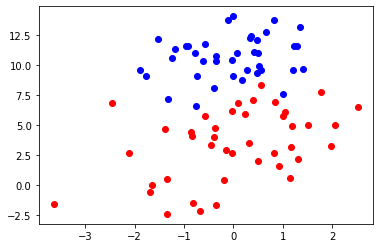

In [62]:
m_train=int(m*0.8)
Y_train=data[:m_train,-1]
X_train=data[:m_train,:n-1]
Y_test=data[m_train:,-1]
X_test=data[m_train:,:n-1]
for sample,label in zip(X_train,Y_train):
    if label==1:
        plt.scatter(sample[0],sample[1],c='r')
    else:
        plt.scatter(sample[0],sample[1],c='b')
plt.show()

## 训练模型

In [63]:
model=Perceptron()
model.fit(X_train,Y_train)
model.w

100%|██████████| 200/200 [00:00<00:00, 2064.69it/s]


array([ 0.95357032, -3.20312764])

## 测试集数据分布及决策边界

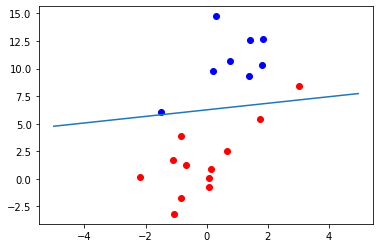

In [64]:
for sample,label in zip(X_test,Y_test):
    if label==1:
        plt.scatter(sample[0],sample[1],c='r')
    else:
        plt.scatter(sample[0],sample[1],c='b')

x = np.arange(-5,5,0.05)
y=[(-model.w[0]*i-model.b[0])/model.w[1] for i in x]
plt.plot(x,y)
plt.show()

## 测试集准确率

In [65]:
res=[]
for sample,actual in zip(X_test,Y_test):
    if model.predict(sample)==actual:
        res.append(1)
    else:
        res.append(0)
print('准确率 = ',sum(res)/len(res)*100,'%')

准确率 =  95.0 %
